In [1]:
import os
from os.path import abspath, join, pardir
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import graphviz

In [2]:
#!pip install kneed

In [3]:
df=pd.read_excel("WonderfulWinesoftheWorld.xlsx")

In [4]:
df

,Custid,Dayswus,Age,Edu,Income,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit
0,5325.0,653.000,55.0000,20.0000,78473.000,20.0000,18.0000,826.0000,445.0000,7.0000,67.0000,4.0000,26.0000,2.0000,1.0000,1.0000,36.0000,5.0000
1,3956.0,1041.000,75.0000,18.0000,105087.000,36.0000,33.0000,1852.0000,539.0000,2.0000,49.0000,0.0000,46.0000,1.0000,3.0000,0.0000,20.0000,4.0000
2,3681.0,666.000,18.0000,12.0000,27984.000,4.0000,56.0000,39.0000,-7.0000,88.0000,4.0000,29.0000,14.0000,32.0000,21.0000,48.0000,60.0000,8.0000
3,2829.0,1049.000,42.0000,16.0000,61748.000,2.0000,46.0000,37.0000,-6.0000,70.0000,86.0000,1.0000,11.0000,1.0000,1.0000,55.0000,59.0000,7.0000
4,8788.0,837.000,47.0000,16.0000,65789.000,2.0000,3.0000,36.0000,4.0000,35.0000,85.0000,0.0000,12.0000,2.0000,1.0000,28.0000,63.0000,6.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,4070.0,596.000,66.0000,15.0000,84714.000,18.0000,45.0000,720.0000,391.0000,5.0000,30.0000,12.0000,36.0000,10.0000,12.0000,13.0000,18.0000,2.0000
9997,7909.0,619.000,18.0000,12.0000,40466.000,3.0000,65.0000,47.0000,5.0000,23.0000,6.0000,24.0000,10.0000,38.0000,22.0000,41.0000,58.0000,5.0000
9998,4158.0,1107.000,33.0000,16.0000,53661.000,1.0000,368.0000,15.0000,2.0000,35.0000,18.0000,13.0000,45.0000,11.0000,13.0000,13.0000,60.0000,6.0000
9999,4914.0,979.000,55.0000,16.0000,94926.000,25.0000,28.0000,1148.0000,293.0000,7.0000,63.0000,10.0000,13.0000,11.0000,3.0000,4.0000,34.0000,5.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Freq         10001 non-null  float64
 6   Recency      10001 non-null  float64
 7   Monetary     10001 non-null  float64
 8   LTV          10001 non-null  float64
 9   Perdeal      10001 non-null  float64
 10  Dryred       10001 non-null  float64
 11  Sweetred     10001 non-null  float64
 12  Drywh        10001 non-null  float64
 13  Sweetwh      10001 non-null  float64
 14  Dessert      10001 non-null  float64
 15  Exotic       10001 non-null  float64
 16  WebPurchase  10001 non-null  float64
 17  WebVisit     10001 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [6]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Custid,10000.0,6000.5000,2886.895680,1001.0,3500.75,6000.5,8500.25,11000.0
Dayswus,10001.0,898.1020,202.482664,550.0,724.00,894.0,1074.00,1250.0
Age,10001.0,47.9273,17.301856,18.0,33.00,48.0,63.00,78.0
Edu,10001.0,16.7391,1.876281,12.0,15.00,17.0,18.00,20.0
Income,10001.0,69904.3580,27610.852665,10000.0,47646.00,70009.0,92147.00,140628.0
Freq,10001.0,14.6281,11.968475,1.0,4.00,12.0,24.00,56.0
Recency,10001.0,62.4068,69.870762,0.0,26.00,52.0,78.00,549.0
Monetary,10001.0,622.5552,647.102966,6.0,63.00,383.0,1077.00,3052.0
LTV,10001.0,209.0712,291.971441,-178.0,-2.00,57.0,364.00,1791.0
Perdeal,10001.0,32.3972,27.895699,0.0,6.00,25.0,56.00,97.0


In [7]:
df.isnull().sum()

Custid         1
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [8]:
df.set_index("Custid", inplace=True)

In [9]:
scaler=StandardScaler()

In [10]:
col_names=['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred',
            'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit']

In [11]:
columns_cluster=['Age','Income','Monetary', 'LTV', 'WebPurchase', 'Freq']

In [12]:
features = df[columns_cluster]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = columns_cluster)
scaled_features.head()

,Age,Income,Monetary,LTV,WebPurchase,Freq
0,0.408803,0.310352,0.314409,0.808095,-0.344283,0.448860
1,1.564806,1.274296,1.900016,1.130060,-1.208204,1.785772
2,-1.729803,-1.518332,-0.901842,-0.740079,0.951598,-0.888052
3,-0.342599,-0.295419,-0.904932,-0.736654,0.897603,-1.055166
4,-0.053598,-0.149056,-0.906478,-0.702402,1.113583,-1.055166


Text(0, 0.5, 'Inertia')

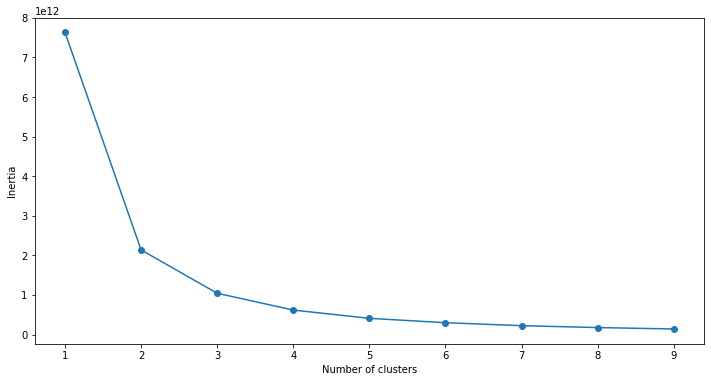

In [13]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df)

# Now, print the silhouette score of this model

print(silhouette_score(df, kmeans.labels_, metric='euclidean'))


0.5594179355033803


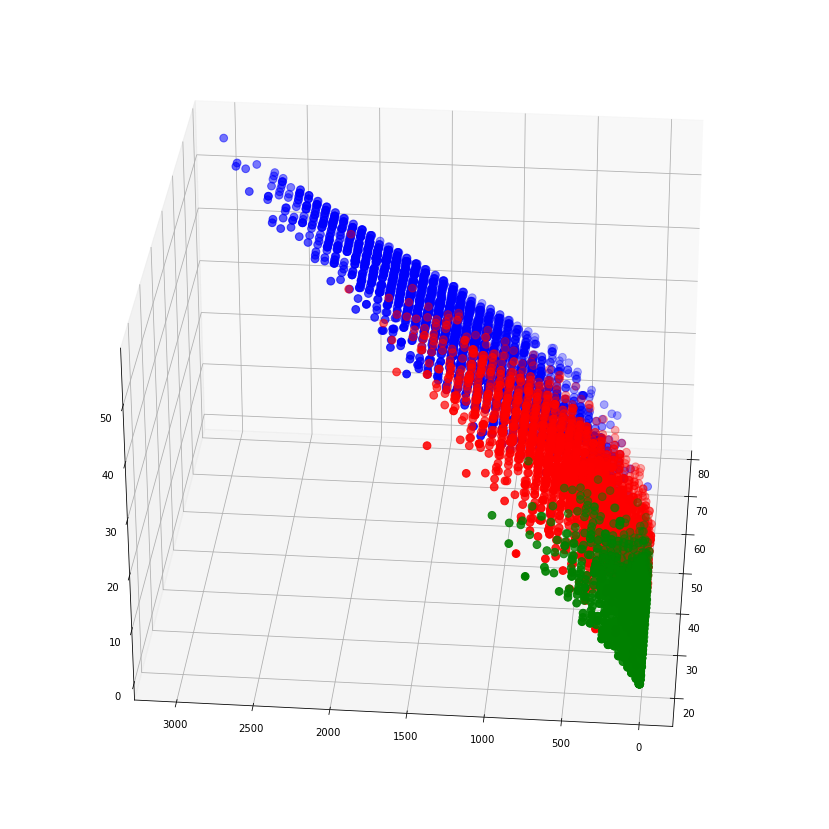

In [15]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
df["label"] = clusters
 
fig = plt.figure(figsize=(40,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Monetary"][df.label == 0], df["Freq"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Monetary"][df.label == 1], df["Freq"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Monetary"][df.label == 2], df["Freq"][df.label == 2], c='green', s=60)

ax.view_init(30, 185)
plt.show()


In [16]:
new_df=df[['Age', 'Monetary', 'LTV', 'Income', 'WebPurchase', 'Freq']]

In [17]:
pred = clusters
frame = pd.DataFrame(new_df)
frame['cluster'] = pred
frame.head()

,Age,Monetary,LTV,Income,WebPurchase,Freq,cluster
Custid,,,,,,,
5325.0,55.0,826.0,445.0,78473.0,36.0,20.0,1
3956.0,75.0,1852.0,539.0,105087.0,20.0,36.0,0
3681.0,18.0,39.0,-7.0,27984.0,60.0,4.0,2
2829.0,42.0,37.0,-6.0,61748.0,59.0,2.0,1
8788.0,47.0,36.0,4.0,65789.0,63.0,2.0,1


In [18]:
new_df

,Age,Monetary,LTV,Income,WebPurchase,Freq,cluster
Custid,,,,,,,
5325.0,55.0000,826.0000,445.0000,78473.000,36.0000,20.0000,1
3956.0,75.0000,1852.0000,539.0000,105087.000,20.0000,36.0000,0
3681.0,18.0000,39.0000,-7.0000,27984.000,60.0000,4.0000,2
2829.0,42.0000,37.0000,-6.0000,61748.000,59.0000,2.0000,1
8788.0,47.0000,36.0000,4.0000,65789.000,63.0000,2.0000,1
...,...,...,...,...,...,...,...
4070.0,66.0000,720.0000,391.0000,84714.000,18.0000,18.0000,1
7909.0,18.0000,47.0000,5.0000,40466.000,58.0000,3.0000,2
4158.0,33.0000,15.0000,2.0000,53661.000,60.0000,1.0000,2


In [19]:
avg_df = new_df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Monetary,LTV,Income,WebPurchase,Freq
0,0,67.229326,1378.692430,542.630089,102262.610687,23.764631,28.521947
1,1,48.462209,454.836719,107.693645,70578.373310,45.666491,12.269483
2,2,28.937500,82.491505,0.423240,38310.148362,56.574636,3.923240


<AxesSubplot:xlabel='cluster', ylabel='Age'>

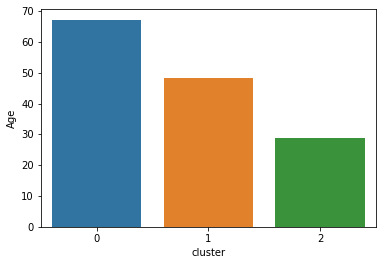

In [20]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

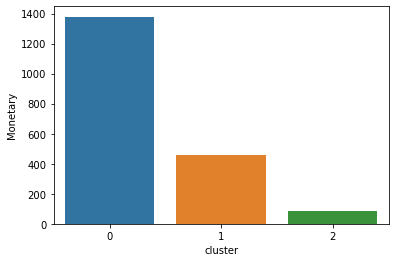

In [21]:
sns.barplot(x='cluster',y='Monetary',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='LTV'>

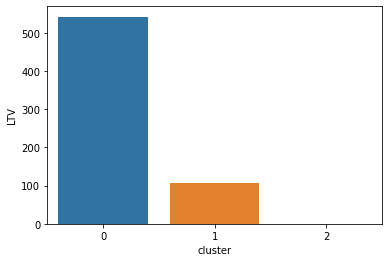

In [22]:
sns.barplot(x='cluster',y='LTV',data=avg_df)

Hierarchical Clustering

In [23]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(distance_threshold=3,linkage='ward', affinity='euclidean', n_clusters=None, compute_full_tree=True, compute_distances=True)
hc_labels = hclust.fit_predict(scaled_features)
hc_labels

array([ 50, 137,  84, ..., 127, 125,  10], dtype=int64)

In [24]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

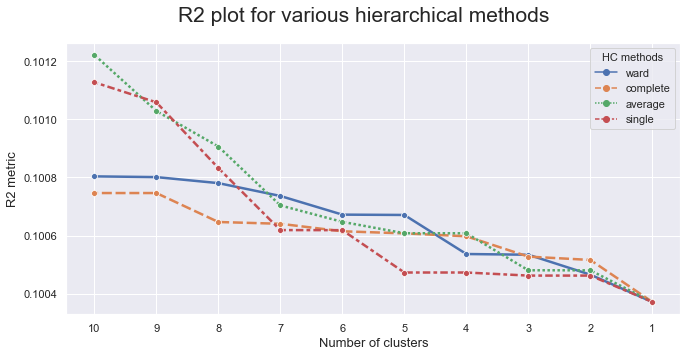

In [25]:

# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(new_df, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

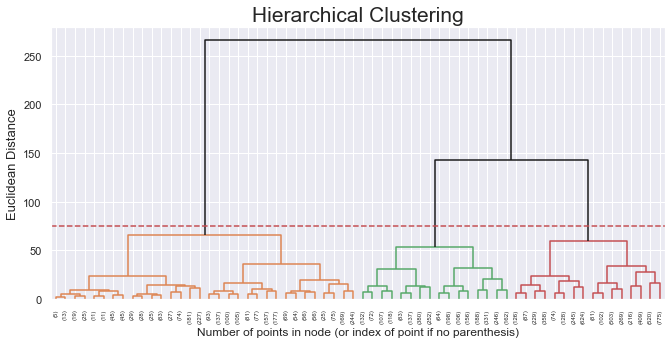

In [26]:

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 75
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [27]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
hc_labels = hclust.fit_predict(scaled_features)
hc_labels

array([2, 0, 1, ..., 1, 0, 2], dtype=int64)

In [28]:
pred = hc_labels
frame = pd.DataFrame(new_df)
frame['h_cluster'] = pred
frame.head(5)

,Age,Monetary,LTV,Income,WebPurchase,Freq,cluster,h_cluster
Custid,,,,,,,,
5325.0,55.0,826.0,445.0,78473.0,36.0,20.0,1,2
3956.0,75.0,1852.0,539.0,105087.0,20.0,36.0,0,0
3681.0,18.0,39.0,-7.0,27984.0,60.0,4.0,2,1
2829.0,42.0,37.0,-6.0,61748.0,59.0,2.0,1,1
8788.0,47.0,36.0,4.0,65789.0,63.0,2.0,1,1


<AxesSubplot:xlabel='h_cluster', ylabel='Monetary'>

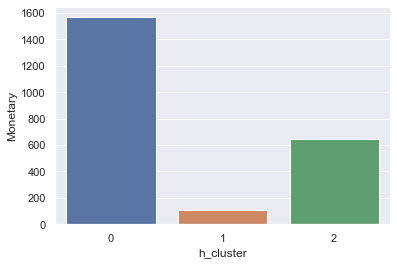

In [29]:
avg_df = new_df.groupby(['h_cluster'], as_index=False).mean()
sns.barplot(x='h_cluster',y='Monetary',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='Age'>

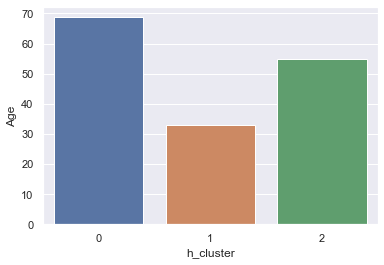

In [30]:
sns.barplot(x='h_cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='LTV'>

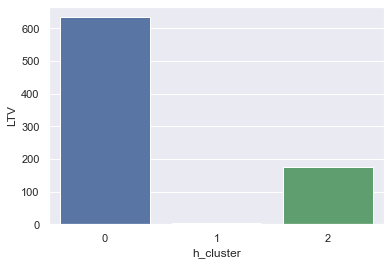

In [31]:
sns.barplot(x='h_cluster',y='LTV',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='Income'>

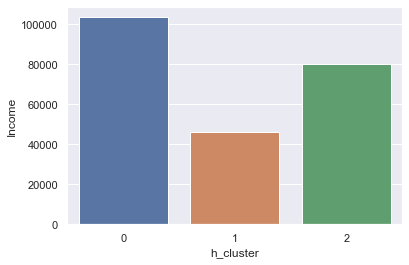

In [32]:
sns.barplot(x='h_cluster',y='Income',data=avg_df)

<AxesSubplot:xlabel='h_cluster', ylabel='WebPurchase'>

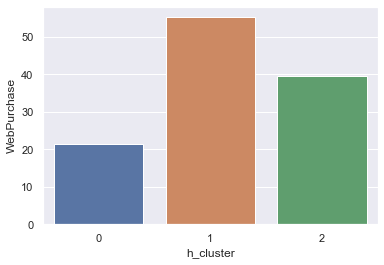

In [36]:
sns.barplot(x='h_cluster',y='WebPurchase',data=avg_df)

In [33]:
new_df.value_counts('h_cluster')

h_cluster
1    4746
2    2732
0    2523
dtype: int64